In [155]:
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [156]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow = 1*(u.kilogram/u.second)
    density = 1100*(u.kilogram/u.meter**3)
    viscosity = 0.00016*(u.pascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.00635*(u.meter)
    maxDiam = 0.127*(u.meter)
    diamStep = 0.000254*(u.meter)
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    straightLength = float(5)*u.meter
  
    
    #Calculated Variables
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)
    
    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

c:\Users\goose\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


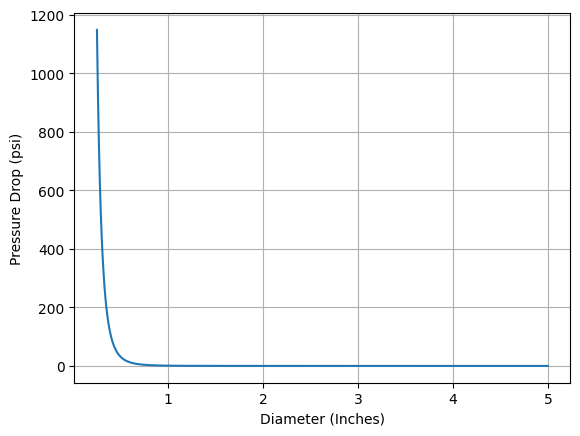

(1100 <Unit('kilogram / meter ** 3')>,
 array([28.70582169, 26.5401458 , 24.61061531, 22.8841053 , 21.33310173,
        19.9345984 , 18.66923887, 17.52064312, 16.47487471, 15.52001605,
        14.64582739, 13.84347111, 13.10528748, 12.42461119, 11.79562035,
        11.2132116 , 10.67289623, 10.17071347,  9.70315768,  9.26711702,
         8.85982151,  8.47879894,  8.12183728,  7.7869525 ,  7.47236092,
         7.17645542,  6.89778491,  6.63503645,  6.38701978,  6.15265383,
         5.9309549 ,  5.72102633,  5.52204942,  5.33327543,  5.15401855,
         4.9836496 ,  4.82159058,  4.66730972,  4.5203171 ,  4.38016078,
         4.24642333,  4.11871868,  3.99668936,  3.88000401,  3.76835508,
         3.66145685,  3.55904355,  3.46086778,  3.36669892,  3.27632187,
         3.18953574,  3.1061528 ,  3.0259974 ,  2.94890509,  2.87472177,
         2.8033029 ,  2.73451281,  2.66822406,  2.60431682,  2.54267837,
         2.48320257,  2.42578942,  2.37034464,  2.31677926,  2.26500929,
         2.2

In [157]:
variablesFunc()


In [158]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
